## Задание 1

### 0. Inports and pathes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

# Define paths to your data files
# Replace these with your actual file paths
TXT_FILE = '/home/jovyan/work/data/semantic_3d/bildstein_station1_xyz_intensity_rgb.txt'
LABEL_FILE = '/home/jovyan/work/data/semantic_3d/bildstein_station1_xyz_intensity_rgb.labels'

OUTPUT_NAME = '/home/jovyan/work/src/task_3/data/semantic3d/semantic3d_dataset'

### 1. Load data

In [3]:
N = 1_000_000  # Load only 1 million points (adjust based on your RAM)

# Load first N lines of point cloud
points = np.loadtxt(TXT_FILE, max_rows=N)  # shape: (N, 7)

# Load first N labels
labels = np.loadtxt(LABEL_FILE, max_rows=N, dtype=np.int32)  # shape: (N,)

print(f"Loaded {points.shape[0]} points.")

Loaded 1000000 points.


### 2. Color normalization and features extraction

In [4]:
X, Y, Z = points[:, 0], points[:, 1], points[:, 2]
intensity = points[:, 3]
R, G, B = points[:, 4], points[:, 5], points[:, 6]

R = R / 255.0
G = G / 255.0
B = B / 255.0

# Normalize intensity
intensity = (intensity - intensity.min()) / (intensity.max() - intensity.min() + 1e-8)

features = np.stack([X, Y, Z, R, G, B, intensity], axis=1)

### 3. Coordinates normalization

In [5]:
coords = features[:, :3]  # X, Y, Z
coords_centered = coords - coords.mean(axis=0)
coords_scaled = coords_centered / (coords.std(axis=0) + 1e-8)  # avoid division by zero

features[:, :3] = coords_scaled

### 4. Features and labels combination

In [6]:
labels = labels.astype(np.int64)

dataset = np.hstack([features, labels.reshape(-1, 1)])

# Final check
print("Dataset shape:", dataset.shape)  # (N, 8)
print("Data types:", dataset.dtype)

Dataset shape: (1000000, 8)
Data types: float64


### 5. Saving dataset in multiple formats

In [8]:
# Save as .npy
np.save(f'{OUTPUT_NAME}.npy', dataset)

# Save as .txt
np.savetxt(f'{OUTPUT_NAME}.txt', dataset, fmt='%.6f')

# Save as .h5
with h5py.File(f'{OUTPUT_NAME}.h5', 'w') as f:
    f.create_dataset('data', data=dataset)

print(f"Saved dataset as: {OUTPUT_NAME}.npy, .txt, .h5")

Saved dataset as: /home/jovyan/work/src/task_3/data/semantic3d_dataset.npy, .txt, .h5


### 6. Show first 5 rows

In [9]:
print("First 5 rows of dataset (X Y Z R G B intensity label):")
print(dataset[:5])

First 5 rows of dataset (X Y Z R G B intensity label):
[[ 1.27932326  2.3150363  -1.23031798  0.49803922  0.55294118  0.60392157
   0.20027285  0.        ]
 [ 1.26081369  2.32058778 -1.4537734   0.50980392  0.55294118  0.62352941
   0.22482947  0.        ]
 [ 1.26067185  2.32064386 -1.60553687  0.54509804  0.59215686  0.64705882
   0.18608458  6.        ]
 [ 1.2616647   2.32013918 -1.60833006  0.51372549  0.57647059  0.63921569
   0.17544338  0.        ]
 [ 1.26152287  2.3200831  -1.60833006  0.51764706  0.56862745  0.63137255
   0.16371078  0.        ]]


### 7. Visualization of the label distribution

In [10]:
def plot_label_distribution(labels, title="Label Distribution"):
    unique_labels, counts = np.unique(labels, return_counts=True)
    
    plt.figure(figsize=(10, 5))
    plt.bar(unique_labels, counts, color='skyblue', edgecolor='black')
    plt.xlabel('Class Label')
    plt.ylabel('Number of Points')
    plt.title(title)
    plt.xticks(unique_labels)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Optional: print distribution
    print("Label distribution:")
    for label, count in zip(unique_labels, counts):
        print(f"  Class {label}: {count} points")

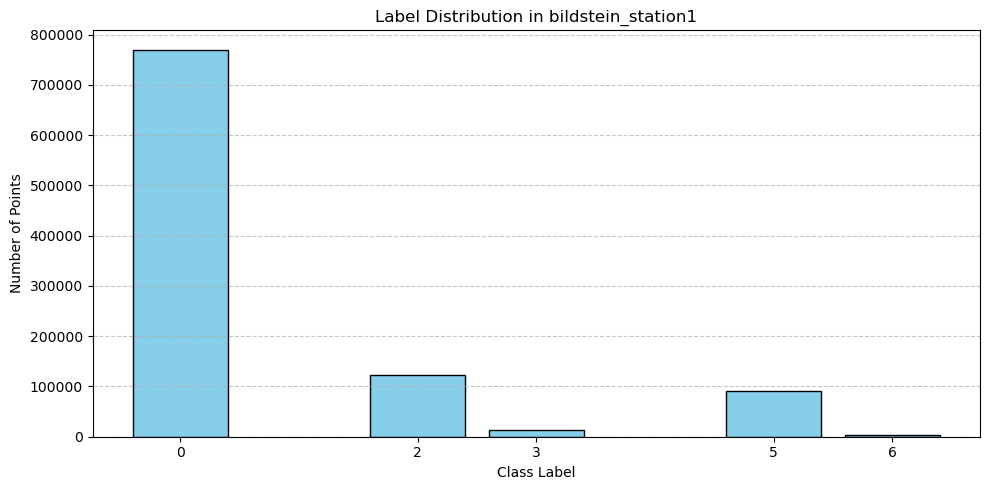

Label distribution:
  Class 0: 769841 points
  Class 2: 121976 points
  Class 3: 13602 points
  Class 5: 91616 points
  Class 6: 2965 points


In [11]:
plot_label_distribution(labels, title="Label Distribution in bildstein_station1")